#### SCOTv1 performance on ambiguous datasets

In [1]:
import yaml
import os
from sklearn.preprocessing import normalize
from types import SimpleNamespace

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))
from run_baselines.scot import scotv1
from run_baselines.scot import scotv2
from run_baselines.run_mmdma import mmdma_case
from run_baselines.unioncom import UnionCom
from pamona import Pamona
from utils.utils import *
from utils.vis import *
%matplotlib inline

Running on cpu


In [2]:
# load parameters and datasets
with open("../cfgs/t_branch.yaml", "r") as file:
        params = yaml.safe_load(file)
params = SimpleNamespace(**params)

data_url1 = os.path.join('..', params.data_path, params.data_url1)
data_url2 = os.path.join('..', params.data_path, params.data_url2)
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join('..', params.data_path, params["label_url1"])
label_url2 = os.path.join('..', params.data_path, params["label_url2"])
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

data size: data1 = (300, 1000), data2 = (300, 2000)


#### 1. SCOT v1

It.  |Err         
-------------------
    0|7.952400e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|3.635058e-12|


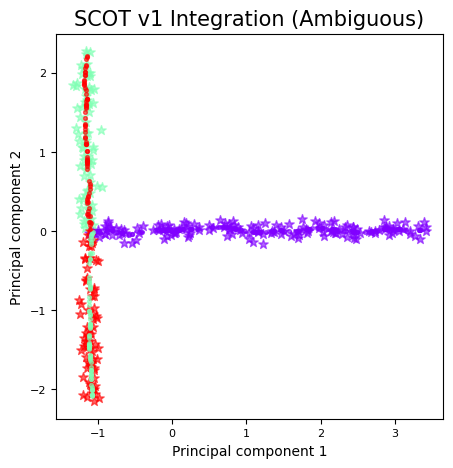

It.  |Err         
-------------------
    0|7.956893e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|5.170346e-12|


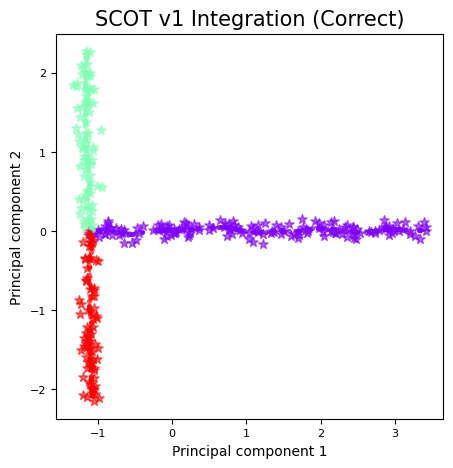

In [3]:
# Ambiguous solution
scot_instance = scotv1.SCOT(data1, data2)
X_aligned, y_aligned = scot_instance.align(k=40, e=0.001, mode='distance', metric='euclidean', normalize=False)
plt_mapping_by_labels(X_aligned, y_aligned, label1, label2, title = "SCOT v1 Integration (Ambiguous)", a = 0.6, show=True)  

# Correct solution
scot_instance = scotv1.SCOT(data1, data2)
X_aligned, y_aligned = scot_instance.align(k=36, e=0.001, mode='distance', metric='euclidean', normalize=False)
plt_mapping_by_labels(X_aligned, y_aligned, label1, label2, title = "SCOT v1 Integration (Correct)", a = 0.6, show=True)  

#### 2. SCOT v2

computing intra-domain graph distances
running pairwise dataset alignments
Unbalanced GW step: 0
Unbalanced GW step: 10
Unbalanced GW step: 20
FLAGS [True]
Projection Method embedding


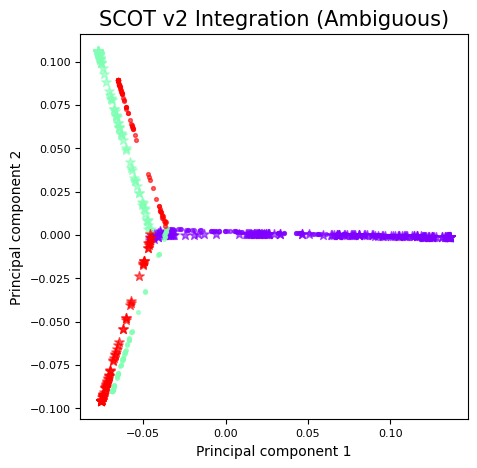

computing intra-domain graph distances
running pairwise dataset alignments
Unbalanced GW step: 0
Unbalanced GW step: 10
Unbalanced GW step: 20
Unbalanced GW step: 30
FLAGS [True]
Projection Method embedding


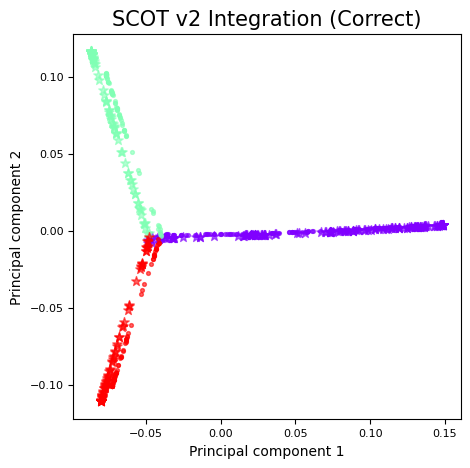

In [4]:
# Ambiguous case
scot_instance = scotv2.SCOTv2([data1, data2])
integrated_data = scot_instance.align(k=23, eps=0.005, rho=0.001, mode='distance', metric='euclidean', normalize=False)
plt_mapping_by_labels(integrated_data[0], integrated_data[1], label1, label2, title = "SCOT v2 Integration (Ambiguous)", a = 0.6, show=True)  

# Correct case
scot_instance = scotv2.SCOTv2([data1, data2])
integrated_data = scot_instance.align(k=20, eps=0.005, rho=0.001, mode='distance', metric='euclidean', normalize=False)
plt_mapping_by_labels(integrated_data[0], integrated_data[1], label1, label2, title = "SCOT v2 Integration (Correct)", a = 0.6, show=True)  

#### 3. MMDMA

Number of dimensions of latent space... 4
Calculated sigma: 1.7100083041729164


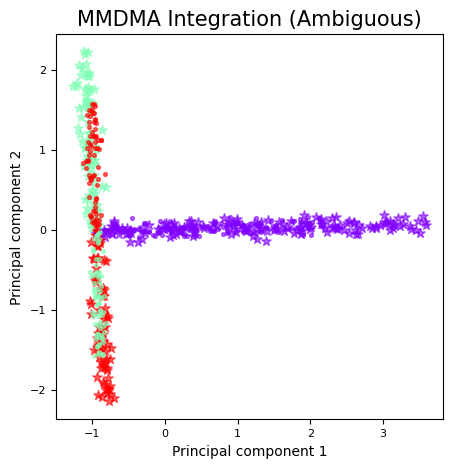

Number of dimensions of latent space... 4
Calculated sigma: 1.7532089719200172


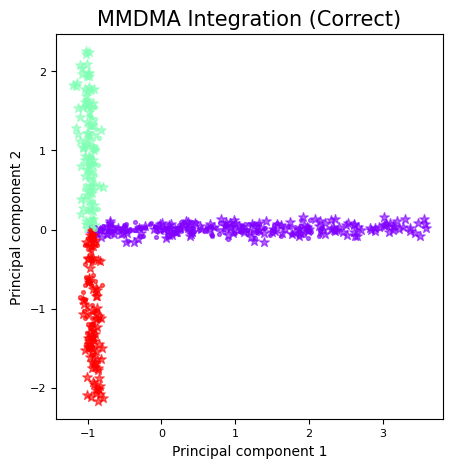

In [5]:
# Ambiguous case
data1_new, data2_new, mapping = mmdma_case(data1, data2, lambda1=1e-3, lambda2=1e-3, seed=1, epoch=5000, sigma=0.0, nfeat=4, kernel="linear")
plt_mapping_by_labels(data1_new, data2_new, label1, label2, title = "MMDMA Integration (Ambiguous)", a = 0.6, show=True)  

# Correct case
data1_new, data2_new, mapping = mmdma_case(data1, data2, lambda1=1e-3, lambda2=1e-3, seed=0, epoch=5000, sigma=0.0, nfeat=4, kernel="linear")
plt_mapping_by_labels(data1_new, data2_new, label1, label2, title = "MMDMA Integration (Correct)", a = 0.6, show=True)  

#### 4. Pamona

Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|3.972580e-03|
   10|3.275321e-08|
   20|1.051343e-16|
Pamona Done! takes 1.431739 seconds


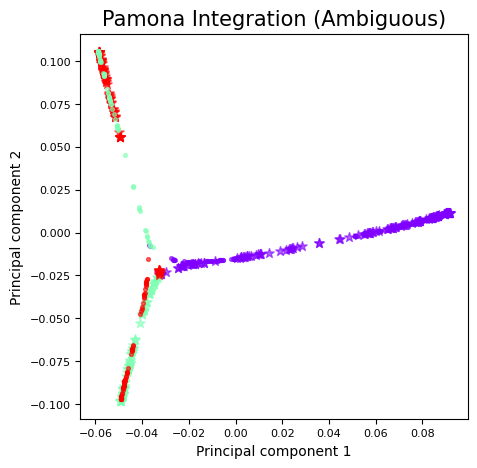

Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|7.944398e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|4.033423e-13|
Pamona Done! takes 1.404831 seconds


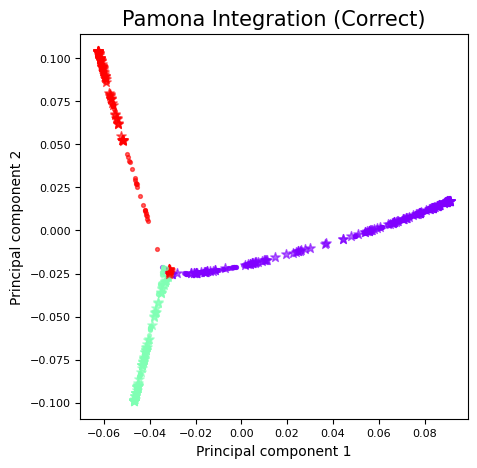

In [6]:
# Ambiguous case
pa = Pamona.Pamona(epsilon=0.01, Lambda=1.0, n_neighbors=5, n_shared=None)
integrated_data, mapping = pa.run_Pamona([data1, data2])
plt_mapping_by_labels(integrated_data[0], integrated_data[1], label1, label2, title = "Pamona Integration (Ambiguous)", a = 0.6, show=True)  

# Correct case
pa = Pamona.Pamona(epsilon=0.001, Lambda=1.0, n_neighbors=5, n_shared=None)
integrated_data, mapping = pa.run_Pamona([data1, data2])
plt_mapping_by_labels(integrated_data[0], integrated_data[1], label1, label2, title = "Pamona Integration (Correct)", a = 0.6, show=True)  

#### 5. UnionCom

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Final k = 7
Dataset 1: (300, 2000)
Final k = 7
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:2.3856 alpha:1.2038
epoch:[200/2000] err:0.3196 alpha:0.1613
epoch:[300/2000] err:1.0529 alpha:0.5773
epoch:[400/2000] err:1.2716 alpha:0.8634
epoch:[500/2000] err:0.9745 alpha:1.0794
epoch:[600/2000] err:0.8135 alpha:1.1869
epoch:[700/2000] err:0.7597 alpha:1.2346
epoch:[800/2000] err:0.7375 alpha:1.2558
epoch:[900/2000] err:0.7154 alpha:1.2666
epoch:[1000/2000] err:0.5791 alpha:1.2819
epoch:[1100/2000] err:0.3867 alpha:1.2987
epoch:[1200/2000] err:0.3021 alpha:1.3071
epoch:[1300/2000] err:0.2657 alpha:1.3117
epoch:[1400/2000] err:0.2449 alpha:1.3148
epoch:[1500/2000] err:0.2302 alpha:1.3172
epoch:[1600/2000] err:0.2186 alpha:1.3192
epoch:[1700/2000] err:0.2091 alpha:1.3209
epoch:[1800/2000] err:0.2009 alpha:1.3223
epoch:[1900/2000] err:0.1937 alpha:1.3236


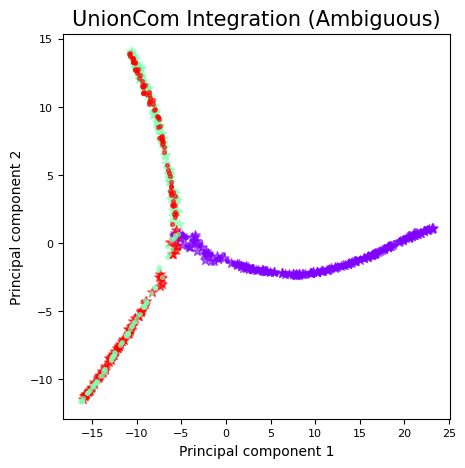

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Final k = 18
Dataset 1: (300, 2000)
Final k = 18
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:2.2814 alpha:1.2389
epoch:[200/2000] err:0.3057 alpha:0.1660
epoch:[300/2000] err:1.0075 alpha:0.5956
epoch:[400/2000] err:1.2367 alpha:0.8844
epoch:[500/2000] err:0.9622 alpha:1.1046
epoch:[600/2000] err:0.8072 alpha:1.2167
epoch:[700/2000] err:0.7572 alpha:1.2666
epoch:[800/2000] err:0.7370 alpha:1.2884
epoch:[900/2000] err:0.7185 alpha:1.2992
epoch:[1000/2000] err:0.6078 alpha:1.3138
epoch:[1100/2000] err:0.4115 alpha:1.3335
epoch:[1200/2000] err:0.3178 alpha:1.3436
epoch:[1300/2000] err:0.2768 alpha:1.3491
epoch:[1400/2000] err:0.2539 alpha:1.3526
epoch:[1500/2000] err:0.2383 alpha:1.3553
epoch:[1600/2000] err:0.2262 alpha:1.3575
epoch:[1700/2000] err:0.2162 alpha:1.3593
epoch:[1800/2000] err:0.2078 alpha:1.3609
epoch:[1900/2000] err:0.2003 alpha:1.362

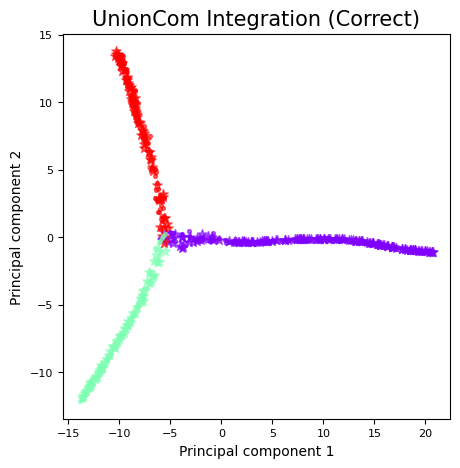

In [7]:
# Ambiguous case
uc = UnionCom.UnionCom(rho=1, kmin=5, epoch_pd=2000, epsilon=0.01, log_pd=100)
integrated_data, mapping = uc.fit_transform(dataset=[data1,data2])
plt_mapping_by_labels(integrated_data[0], integrated_data[1], label1, label2, title = "UnionCom Integration (Ambiguous)", a = 0.6, show=True)  

# Correct case
uc = UnionCom.UnionCom(rho=1, kmin=18, epoch_pd=2000, epsilon=0.01, log_pd=100)
integrated_data, mapping = uc.fit_transform(dataset=[data1,data2])
plt_mapping_by_labels(integrated_data[0], integrated_data[1], label1, label2, title = "UnionCom Integration (Correct)", a = 0.6, show=True)  